# MIBI-TOF human colorectal carcinoma

In [1]:
import scanpy as sc
import spacec as sp
import warnings
warnings.filterwarnings("ignore")

2025-04-14 15:47:34.894290: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:root: * TissUUmaps version: 3.1.1.6


In [2]:
data_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/Manuscript/NatComm_091624/revision_031225/analysis/app_spatial_proteomics/'
output_dir = '/Users/yuqitan/Nolan Lab Dropbox/Yuqi Tan/analysis_pipeline/Manuscript/NatComm_091624/revision_031225/analysis/app_spatial_proteomics/output/'

In [3]:
# trying to read the imc
adata = sc.read(data_dir + 'mibitof_adata.h5ad')
adata

AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2'
    uns: 'Cluster_colors', 'batch_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'X_scanorama', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs['x'] = [sublist[0] for sublist in adata.obsm['spatial']]
adata.obs['y'] = [sublist[1] for sublist in adata.obsm['spatial']]

## Scatter plot

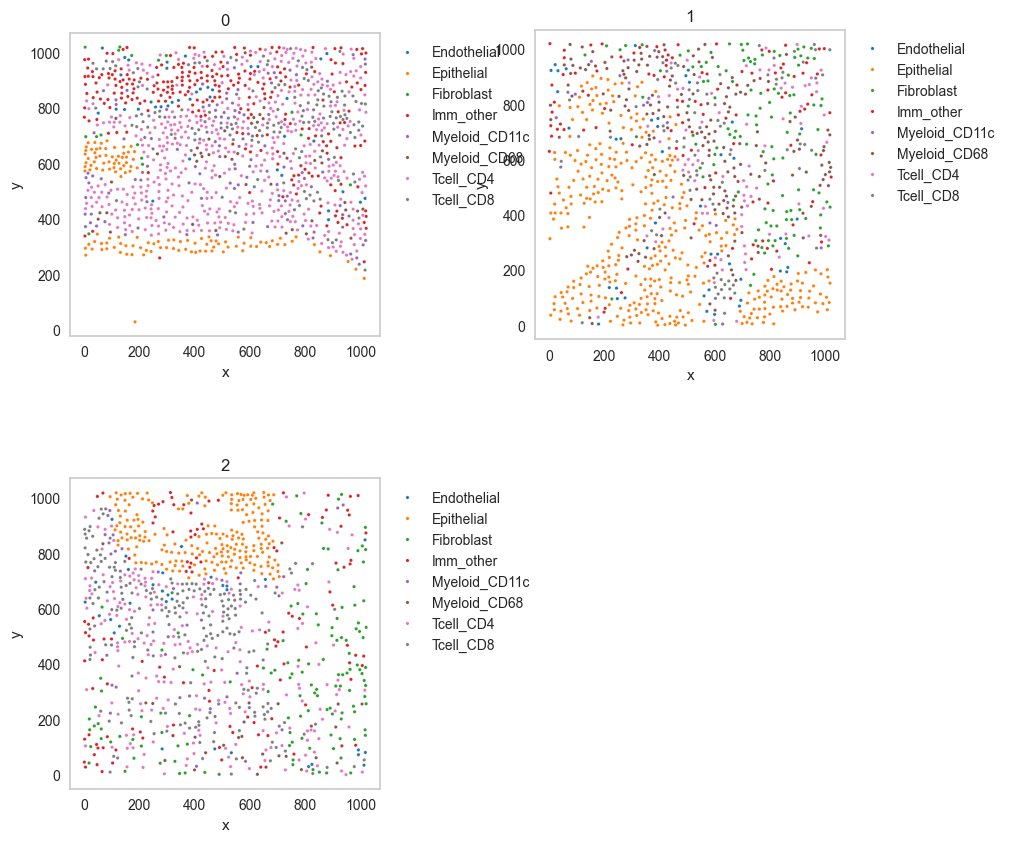

In [5]:
df = sp.pl.catplot(
    adata, 
    color = "Cluster", # specify group column name here (e.g. celltype_fine)
    unique_region = "batch", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=2, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir= output_dir, # specify output directory here (if savefig=True)
)

## Cell type composition

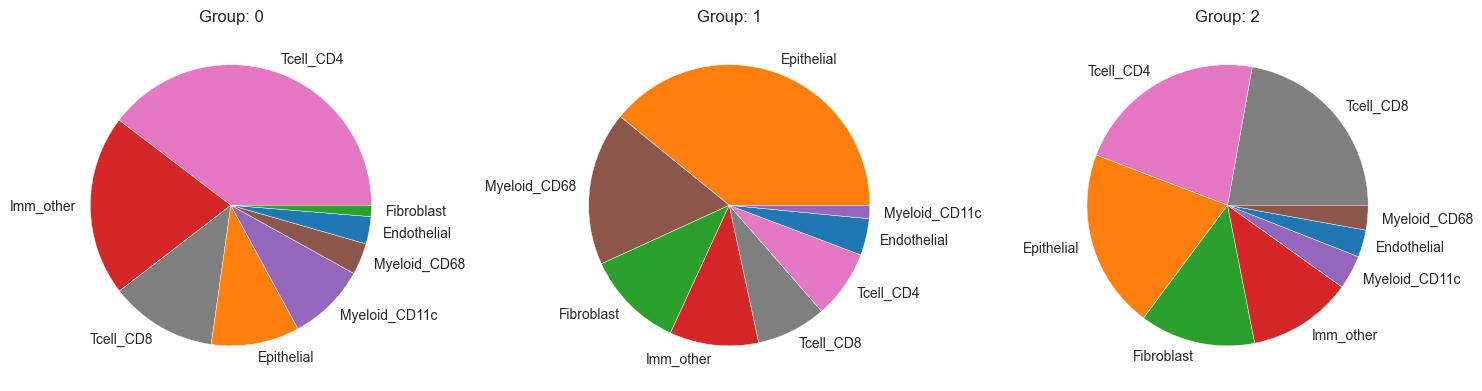

In [6]:
sp.pl.create_pie_charts(
    adata,
    color = "Cluster", 
    grouping = "batch", 
    show_percentages=False,
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # change it to true if you want to save the figure
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir = output_dir #output directory for the figure
)

## Neighborhood analysis

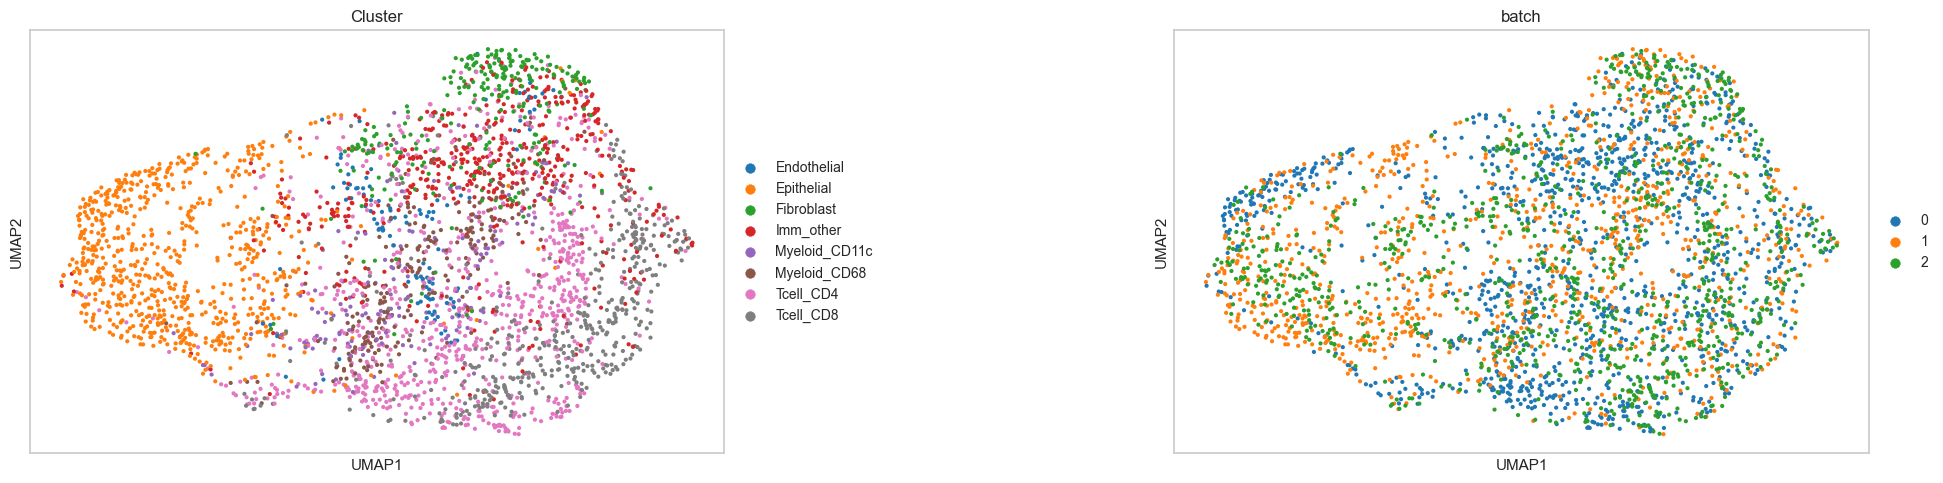

In [7]:
sc.pl.umap(adata, color = ['Cluster', 'batch'], wspace=0.5) 

In [18]:
adata = sp.tl.neighborhood_analysis(
    adata, 
    unique_region = "batch", 
    cluster_col = "Cluster", 
    X = 'x', Y = 'y',
    k = 20, # k nearest neighbors
    n_neighborhoods = 8, #number of CNs
    elbow = False)

Starting: 1/3 : 0
Finishing: 1/3 : 0 0.008551836013793945 0.008671045303344727
Starting: 2/3 : 1
Finishing: 2/3 : 1 0.0064699649810791016 0.015212059020996094
Starting: 3/3 : 2
Finishing: 3/3 : 2 0.005615949630737305 0.020841121673583984


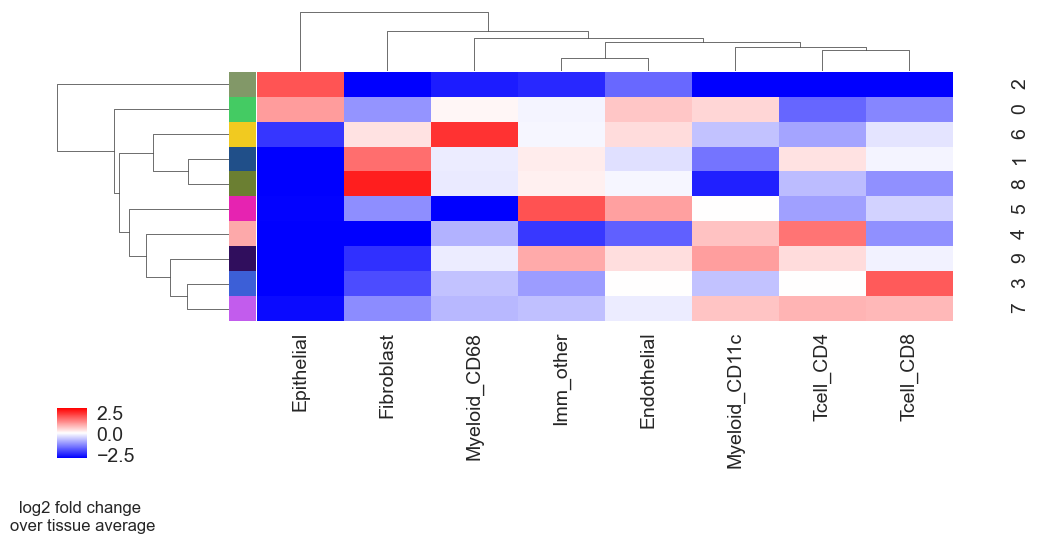

In [19]:
sp.pl.cn_exp_heatmap(
    adata, # anndata
    cluster_col = "Cluster", # cell type column
    cn_col = "CN_k20_n10", # CN column
    palette=None, # color palette for CN
    savefig = False, # save the figure
    output_dir = output_dir, # output directory
    rand_seed = 1 # random seed for reproducibility
)

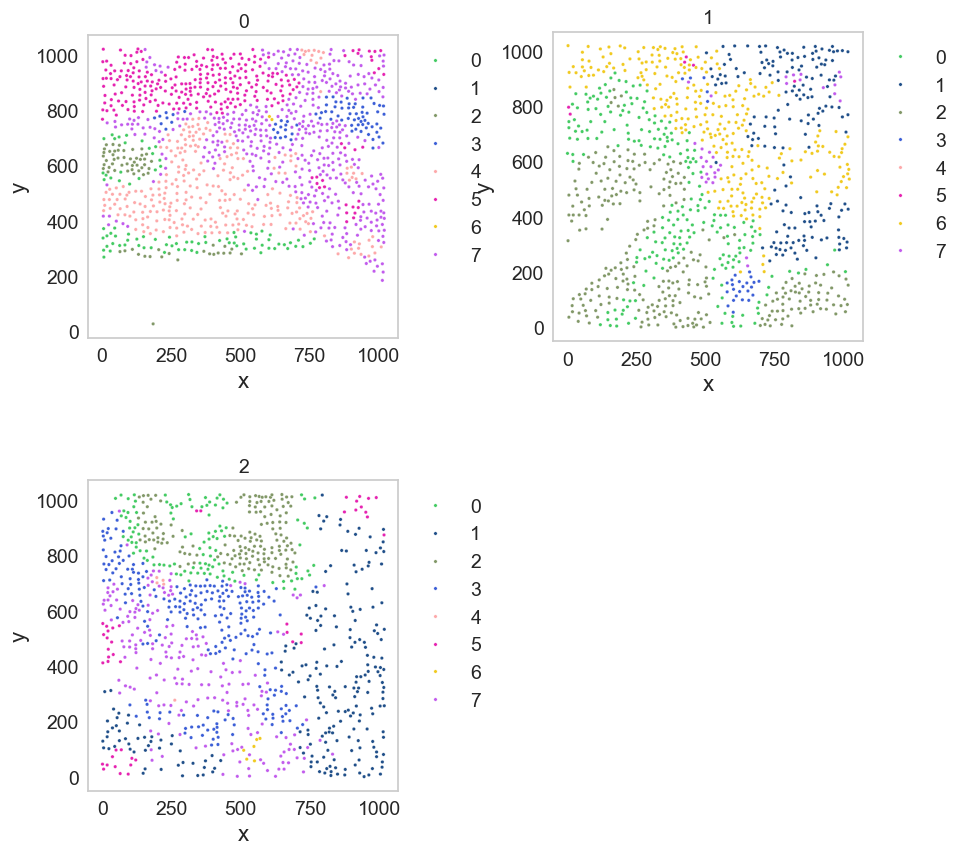

In [20]:
df = sp.pl.catplot(
    adata, 
    color = "CN_k20_n8", # specify group column name here (e.g. celltype_fine)
    unique_region = "batch", # specify unique_regions here
    X='x', Y='y', # specify x and y columns here
    n_columns=2, # adjust the number of columns for plotting here (how many plots do you want in one row?)
    palette=None, #default is None which means the color comes from the anndata.uns that matches the UMAP
    savefig=False, # save figure as pdf
    output_fname = "", # change it to file name you prefer when saving the figure
    output_dir= output_dir, # specify output directory here (if savefig=True)
)

## Spatial context map

Starting: 7/8 : Endothelial
Finishing: 7/8 : Endothelial 0.006070852279663086 0.006963014602661133
Starting: 1/8 : Epithelial
Finishing: 1/8 : Epithelial 0.011197090148925781 0.01810622215270996
Starting: 5/8 : Fibroblast
Finishing: 5/8 : Fibroblast 0.004419803619384766 0.022513866424560547
Starting: 2/8 : Imm_other
Finishing: 2/8 : Imm_other 0.005689859390258789 0.028171062469482422
Starting: 3/8 : Myeloid_CD11c
Finishing: 3/8 : Myeloid_CD11c 0.002629995346069336 0.03075885772705078
Starting: 8/8 : Myeloid_CD68
Finishing: 8/8 : Myeloid_CD68 0.003142118453979492 0.03382086753845215
Starting: 4/8 : Tcell_CD4
Finishing: 4/8 : Tcell_CD4 0.00849294662475586 0.04222679138183594
Starting: 6/8 : Tcell_CD8
Finishing: 6/8 : Tcell_CD8 0.004423856735229492 0.04657578468322754
27 0.010879419764279197


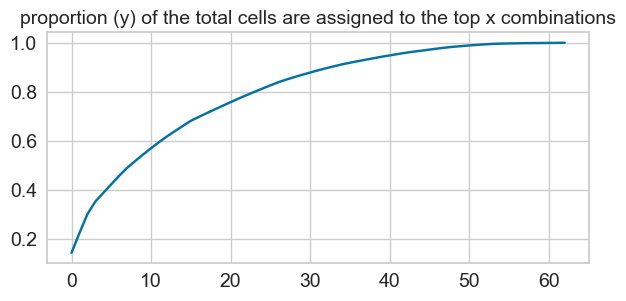

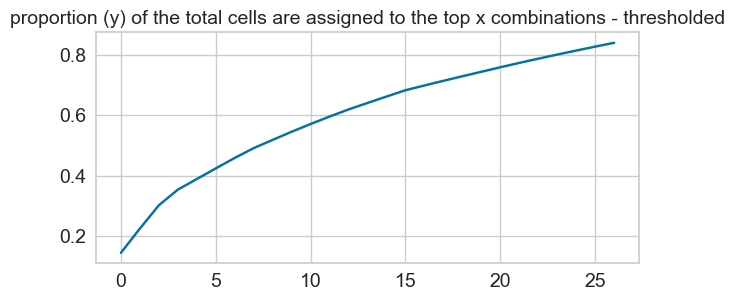

In [21]:
cnmap_dict_mibitof = sp.tl.build_cn_map(
    adata = adata, # adata object
    cn_col = "CN_k20_n8",# column with CNs
    palette = None, # color dictionary
    unique_region = 'Cluster',# column with unique regions
    k = 70, # number of neighbors
    X='x', Y='y',  # coordinates
    threshold = 0.85, # threshold for percentage of cells in CN
    per_keep_thres = 0.85,) # threshold for percentage of cells in CN

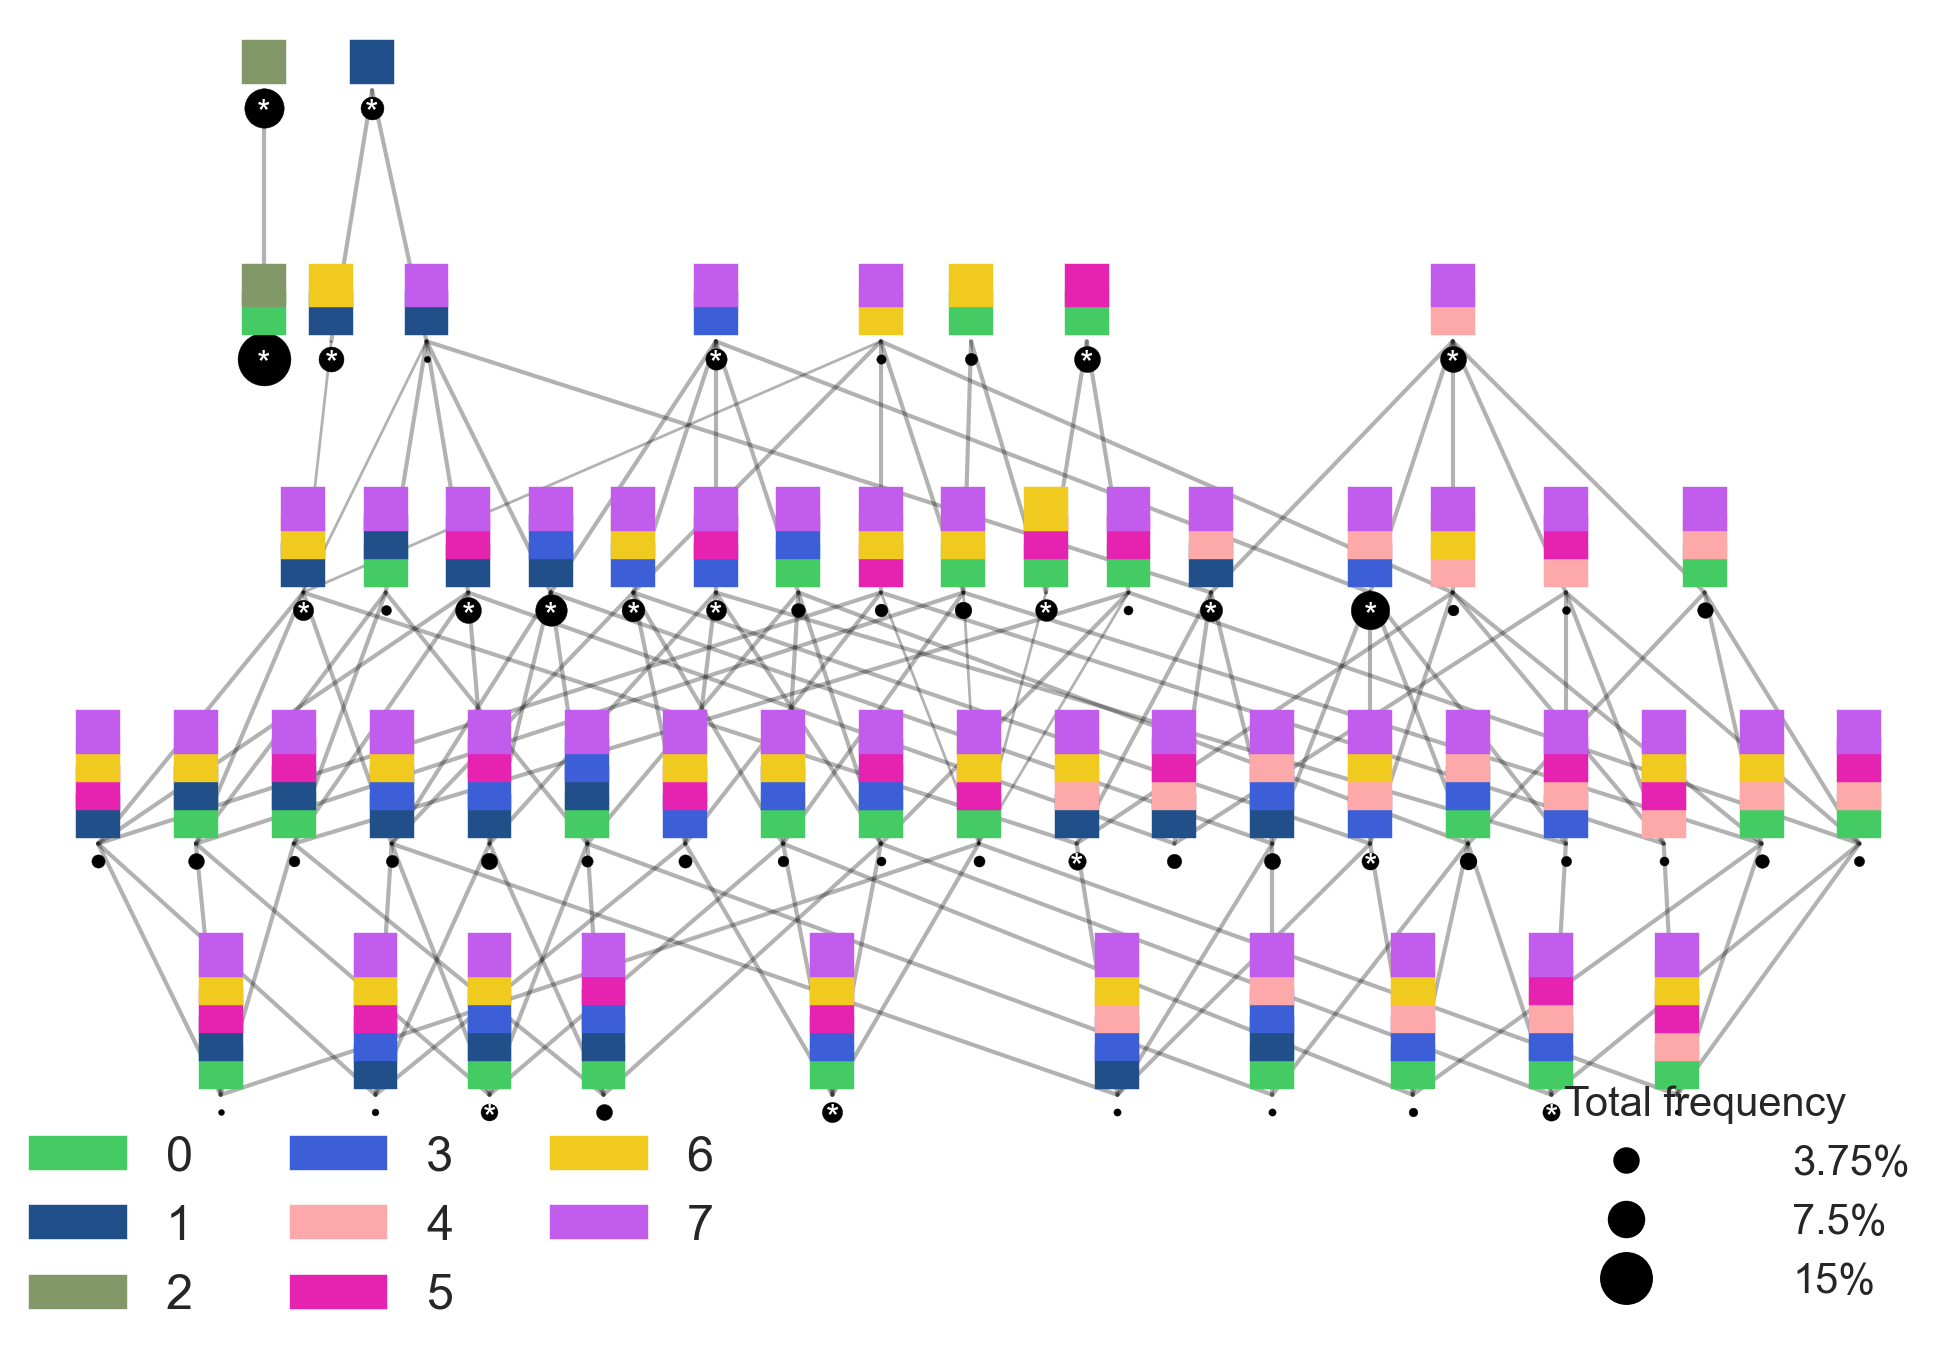

In [22]:
sp.pl.cn_map(cnmap_dict = cnmap_dict_mibitof, # dictionary from the previous step
        adata = adata, # adata object
        cn_col = "CN_k20_n8", # column with CNs used to color the plot
        palette = None, # color dictionary
        figsize=(25, 15), # figure size
        savefig=False, # save figure as pdf
        output_fname = "", # change it to file name you prefer when saving the figure
        output_dir= output_dir # specify output directory here (if savefig=True)
    )

## Barycentric coordinate plots

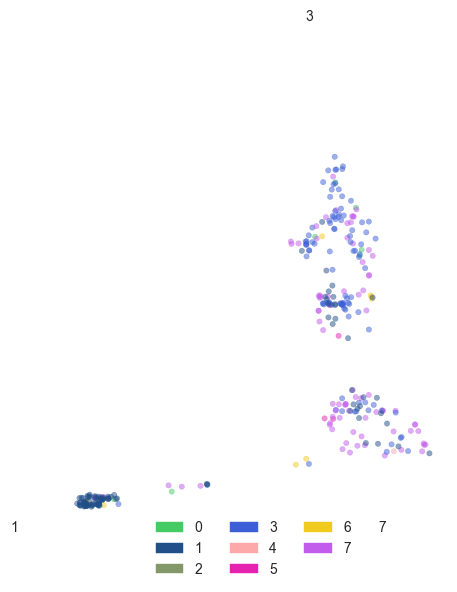

In [35]:
sp.pl.BC_projection(adata=adata,
    cnmap_dict = cnmap_dict_mibitof, # dictionary from the previous step
    cn_col = "CN_k20_n8", # column with CNs
    plot_list = [1, 3, 7], # list of CNs to plot (three for the corners)
    cn_col_annt = "CN_k20_n8", # column with CNs used to color the plot
    palette = None, # color dictionary
    figsize=(5, 5), # figure size
    rand_seed = 1, # random seed for reproducibility
    n_num = None, # number of neighbors
    threshold = 0.6) # threshold for percentage of cells in CN

## Patch proximity analysis

In [26]:
adata.obs["CN_k20_n10"] = adata.obs["CN_k20_n10"].astype(str)

Estimated number of clusters: 1
Estimated number of noise points: 83


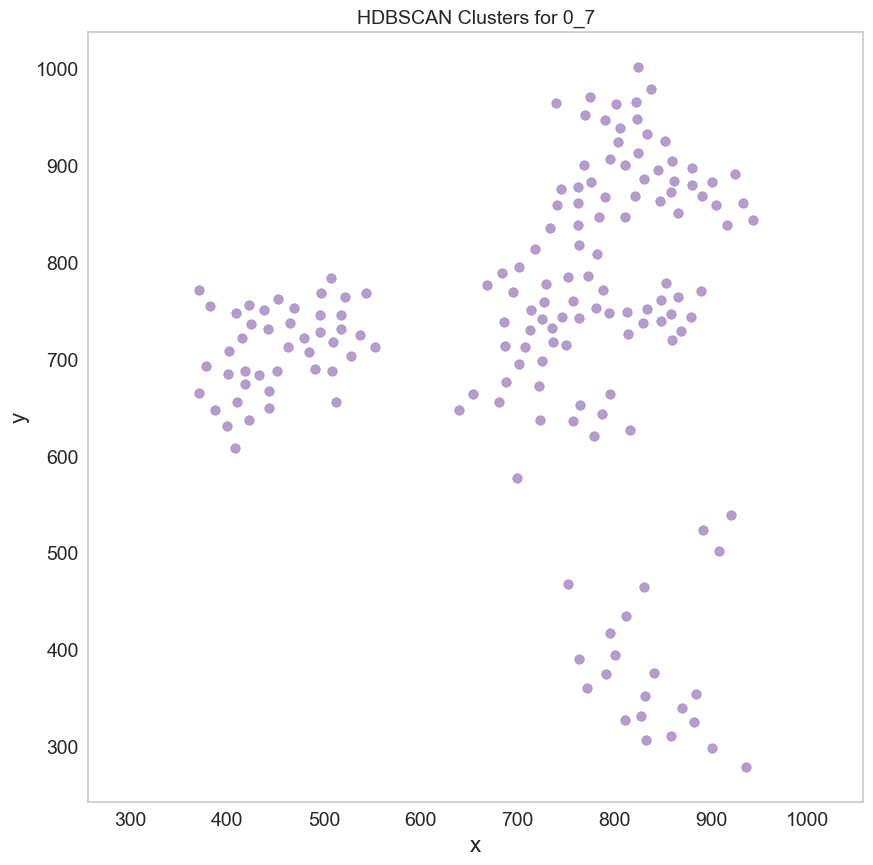

2025-04-14 17:43:06.931194: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:root: * TissUUmaps version: 3.1.1.6


Figure(1500x500)
Finished 0_7
No 7 in 1
Estimated number of clusters: 1
Estimated number of noise points: 162


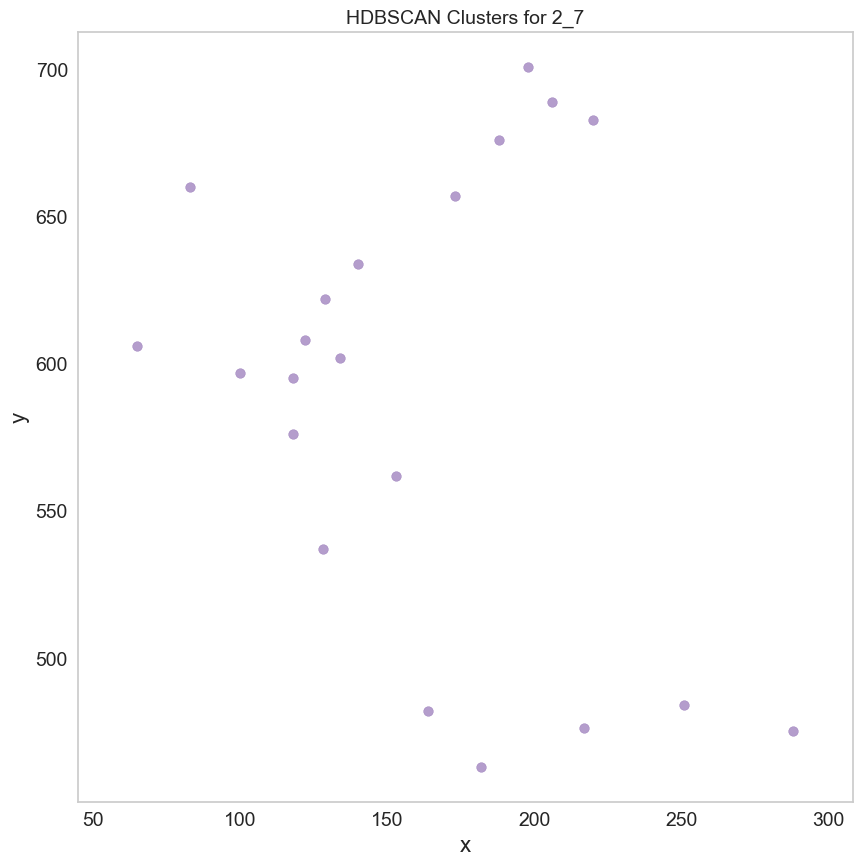

2025-04-14 17:43:18.449883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
INFO:root: * TissUUmaps version: 3.1.1.6


Figure(1500x500)
Finished 2_7


In [42]:
region_results = sp.tl.patch_proximity_analysis(
    adata, 
    region_column = "batch", # column with the region information
    patch_column = "CN_k20_n10", # column with the patch information (derive patches from this column)
    group='7', # group to consider
    min_cluster_size=20, # minimum cluster size to consider
    x_column='x', y_column='y', # spatial coordinates
    radius = 20, # to get the distance in µm
    edge_neighbours = 2, # number of neighbours to consider for edge detection
    key_name = 'ppa_result_20', # key name to store the result in adata.uns
    plot = True) # plot detection for demonstration purposes

Key 0: ppa_result_20
Key 0 has 25 rows.


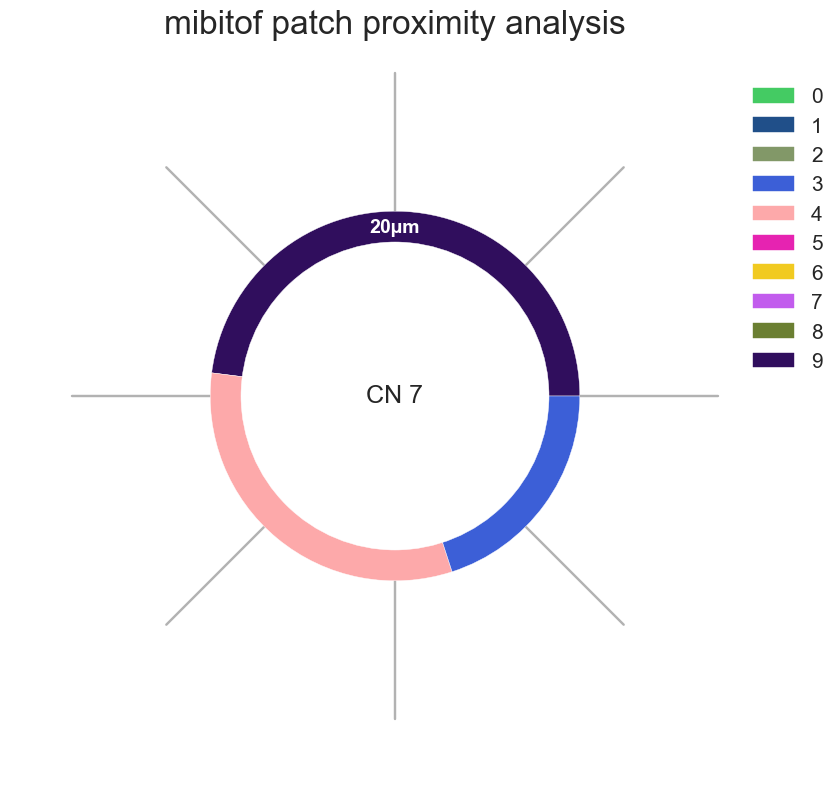

In [44]:
# Donut plots for CNs around Germinal Center
sp.pl.ppa_res_donut(adata, 
                palette=None,
                cat_col = "CN_k20_n10",
                key_names = ['ppa_result_20'],
                radii = [20],
                unit = 'µm',
                figsize = (10,10),  
                add_guides = True,
                text = 'CN 7',
                label_color='white',
                subset_column = None,
                subset_condition = 'batch',
                title='mibitof patch proximity analysis')